In [2]:
import cv2
import matplotlib.pyplot as plt
import dlib
from imutils import face_utils
import numpy as np
font = cv2.FONT_HERSHEY_SIMPLEX

In [7]:
gray = cv2.imread('data/guapa_nata.jpeg', 0)
im = np.float32(gray) / 255.0# Calculate gradient 
gx = cv2.Sobel(im, cv2.CV_32F, 1, 0, ksize=1)
gy = cv2.Sobel(im, cv2.CV_32F, 0, 1, ksize=1)
mag, angle = cv2.cartToPolar(gx, gy, angleInDegrees=True)

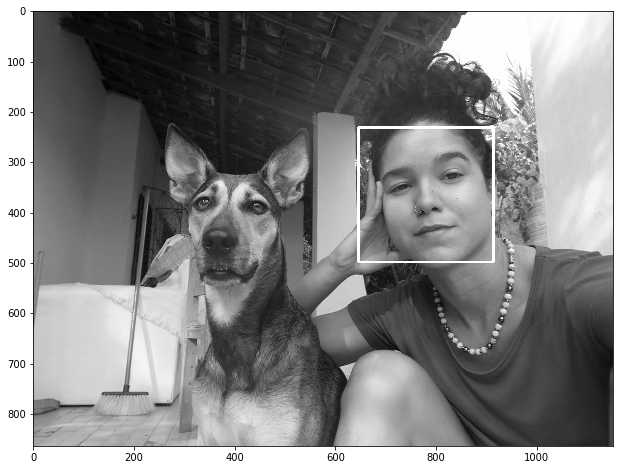

In [8]:
face_detect = dlib.get_frontal_face_detector()
rects = face_detect(gray, 1)

for (i, rect) in enumerate(rects):
    (x, y, w, h) = face_utils.rect_to_bb(rect)
    cv2.rectangle(gray, (x, y), (x + w, y + h), (255, 255, 255), 3)
    
plt.figure(figsize=(12,8))
plt.imshow(gray, cmap='gray')
plt.show()

In [5]:
video_capture = cv2.VideoCapture(0)
flag = 0

while True:

    ret, frame = video_capture.read()

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    rects = face_detect(gray, 1)

    for (i, rect) in enumerate(rects):

        (x, y, w, h) = face_utils.rect_to_bb(rect)

        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

        cv2.imshow('Video', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

video_capture.release()
cv2.destroyAllWindows()